# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df=pd.merge(study_results, mouse_metadata, how='outer', on=['Mouse ID', 'Mouse ID'])
# Display the data table for preview
df.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [3]:
# Total number of mice.
mice_total=len(pd.unique(df['Mouse ID']))
mice_total

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_df = df.loc[df['Mouse ID'] == duplicated_mice[0]]
duplicated_mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = df.drop(duplicated_mice_df.index)
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
new_mice_total=len(pd.unique(cleaned_df['Mouse ID']))
new_mice_total

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen= cleaned_df.groupby('Drug Regimen')

mean=drug_regimen['Tumor Volume (mm3)'].mean()
median=drug_regimen['Tumor Volume (mm3)'].median()
variance=drug_regimen['Tumor Volume (mm3)'].var()
std_deviation=drug_regimen['Tumor Volume (mm3)'].std()
SEM=drug_regimen['Tumor Volume (mm3)'].sem()

summary_df=pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard deviation': std_deviation,
    'SEM': SEM
})

summary_df.head()

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
new_summary=drug_regimen['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
new_summary.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

Text(0.5, 1.0, 'Timepoints for all mice')

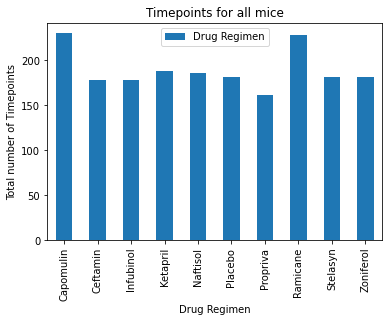

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Plot a bar chart
drug_regimen_count = pd.DataFrame(drug_regimen['Drug Regimen'].count())
bar_chart=drug_regimen_count.plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('Total number of Timepoints')
plt.title('Timepoints for all mice')
             


<BarContainer object of 10 artists>

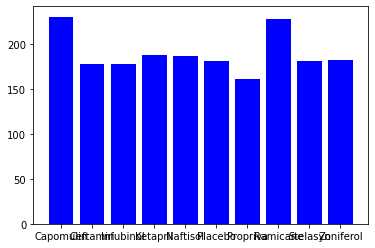

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drug_regimen.count()['Timepoint'].index, drug_regimen.count()['Timepoint'], color = 'b')

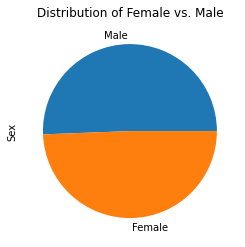

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cleaned_df['Sex'].value_counts().plot(kind = 'pie', title = 'Distribution of Female vs. Male')


([<matplotlib.patches.Wedge at 0x2504c67c5c8>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Female'),
  Text(0.020992503472585782, -1.0997996703027118, 'Male')])

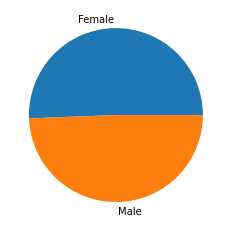

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(cleaned_df['Sex'].value_counts(), labels = cleaned_df['Sex'].unique())

## Quartiles, Outliers and Boxplots

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

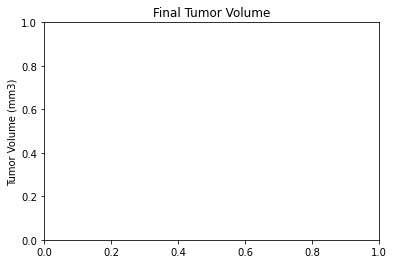

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

